In [24]:
import tensorflow
from  tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [34]:
from PIL import Image
import os

# Ruta de la carpeta con las imágenes originales
folder_path = 'dataframe/logo'

# Ruta de la carpeta donde se guardarán las imágenes editadas
output_folder = 'ejemplo'

# Si la carpeta de salida no existe, créala
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterar sobre cada subcarpeta en la carpeta de entrada
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    # Verificar que la ruta sea una carpeta
    if os.path.isdir(subfolder_path):
        # Iterar sobre cada archivo en la subcarpeta
        for filename in os.listdir(subfolder_path):
            # Ruta completa de la imagen de entrada
            input_path = os.path.join(subfolder_path, filename)
            
            try:
                # Abrir la imagen
                image = Image.open(input_path)
                
                # Iterar sobre 50 grados diferentes de rotación
                for i in range(50):
                    # Rotar la imagen
                    rotated_image = image.rotate(7 * i)  # Rotar 7 grados por cada iteración
                    
                    # Generar un nombre único para la imagen rotada
                    output_filename = f'{os.path.splitext(filename)[0]}_rotated_{i}.png'
                    
                    # Ruta completa de la imagen de salida
                    output_path = os.path.join(subfolder_path, output_folder, output_filename)
                    
                    # Guardar la imagen rotada en la misma carpeta que la imagen original
                    rotated_image.save(output_path)
                    
            except Exception as e:
                print(f"Error al procesar {input_path}: {e}")

print("Proceso completado.")


UnidentifiedImageError: cannot identify image file 'dataframe/logo/Atletico Madrid/.DS_Store'

### Exploración y preparación

3 classes:
['Atletico Madrid', 'Dortmund', 'Real Madrid']


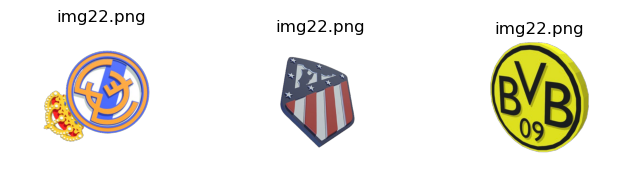

In [25]:
# The images are in the data/shapes folder
data_folder = 'dataframe/logo'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 5

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.2) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 60 images belonging to 3 classes.
Preparing validation dataset...
Found 12 images belonging to 3 classes.
Data generators ready


### CNN

In [27]:
# Define un modelo clasificador CNN (Convolutional Neural Network)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define el modelo como una secuencia de capas
modelo = Sequential()

# La capa de entrada acepta una imagen y aplica una convolución que utiliza 32 filtros de tamaño 6x6 y una función de activación lineal rectificada (ReLU)
modelo.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# A continuación, agregamos una capa de max pooling con un parche de tamaño 2x2
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Podemos agregar tantas capas como creamos necesarias; aquí agregaremos otra capa de convolución y de max pooling
modelo.add(Conv2D(32, (6, 6), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

# Y otro conjunto
modelo.add(Conv2D(32, (6, 6), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

# Una capa de dropout elimina aleatoriamente algunos nodos para reducir las interdependencias (que pueden causar sobreajuste)
modelo.add(Dropout(0.2))

# Aplanamos los mapas de características
modelo.add(Flatten())

# Generamos una capa de salida completamente conectada con una probabilidad predicha para cada clase
# (softmax asegura que todas las probabilidades sumen 1)
modelo.add(Dense(train_generator.num_classes, activation='softmax'))

# Con las capas definidas, ahora podemos compilar el modelo para clasificación categórica (multi-clase)
modelo.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(modelo.summary())


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 123, 123, 32)   │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 23, 23, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        11,619 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,899 (347.26 KB)

 Trainable params: 88,899 (347.26 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
# Entrena el modelo durante 5 épocas utilizando lotes de 30 imágenes y utilizando el conjunto de datos de validación para la validación
num_epochs = 5
history = modelo.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)


Epoch 1/5
 1/12 ━━━━━━━━━━━━━━━━━━━━ 7s 691ms/step - accuracy: 0.2000 - loss: 1.1692

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4181 - loss: 1.1961 - val_accuracy: 0.3000 - val_loss: 1.0686
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.4404
Epoch 3/5


2024-04-21 14:14:41.947656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-21 14:14:41.957560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4098 - loss: 0.9312 - val_accuracy: 0.6000 - val_loss: 0.6413
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.4840
Epoch 5/5
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.0000e+00 - loss: 1.0321

2024-04-21 14:14:42.687536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-21 14:14:42.695041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5526 - loss: 0.6320 - val_accuracy: 1.0000 - val_loss: 0.1252


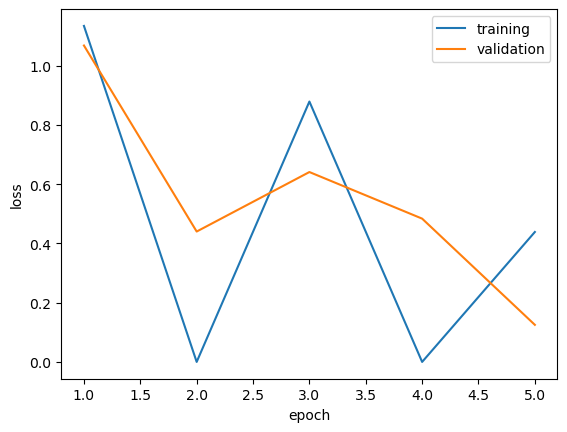

In [29]:
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


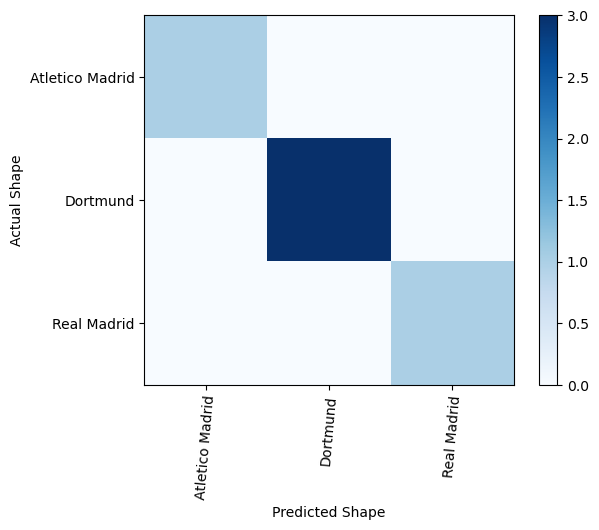

In [30]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = modelo.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

In [31]:
# Evaluar el modelo en los datos de validación
test_loss, test_accuracy = modelo.evaluate(validation_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0947
Test loss: 0.11206597834825516
Test accuracy: 1.0


In [32]:
# Save the trained model
modelFileName = 'modelos/logo_classifier.h5'
modelo.save(modelFileName)
del modelo  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as modelos/logo_classifier.h5
